# Star Wars Survey Exploring

The team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can find [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [44]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

The data has several columns, including:

* **RespondentID** - An anonymized ID for the respondent (person taking the survey)
* **Gender** - The respondent's gender
* **Age** - The respondent's age
* **Household Income** - The respondent's income
* **Education** - The respondent's education level
* **Location** (Census Region) - The respondent's location
* **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response
* **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. 

In [45]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [46]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and preparing columns

We can see that there are some unnamed columns, some columns with strange symbols. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, let's delete rows where RespondentID is NaN

In [47]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].isnull().sum()

0

Next, convert the next two columns, which are: `Have you seen any of the 6 films in the Star Wars franchise?` and  `Do you consider yourself to be a fan of the Star Wars film franchise?`
Both represent Yes/No questions. We will convert it to `True`, `False` and `Nan` values for further analysis

In [48]:
columns = ['Have you seen any of the 6 films in the Star Wars franchise?', 
          'Do you consider yourself to be a fan of the Star Wars film franchise?']
for col in columns:
    star_wars[col] = star_wars[col].map({
                                            'Yes' : True,
                                            'No' : False
                                        })   

In [49]:
print(star_wars[columns[0]].value_counts(dropna = False), end = '\n\n')
print(star_wars[columns[1]].value_counts(dropna = False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll convert each of these columns to a Boolean, then rename the column something more intuitive.

In [50]:
import numpy as np
import re
# itterating over columns and using regex to change values to True and False
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].fillna('0').apply(lambda x: True if re.search(r'([a-zA-Z])', x) else False)

In [51]:
# renaming in a more intuitive way 
star_wars = star_wars.rename(columns = {
   "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6",
})

In [52]:
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite.

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent.

In [53]:
# converting to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# renaming columns
star_wars = star_wars.rename(columns = {
    star_wars.columns[9] : "ranking_1",
    star_wars.columns[10] : "ranking_2",
    star_wars.columns[11] : "ranking_3",
    star_wars.columns[12] : "ranking_4",
    star_wars.columns[13] : "ranking_5",
    star_wars.columns[14] : "ranking_6",
})

In [54]:
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Find the highest-ranked movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



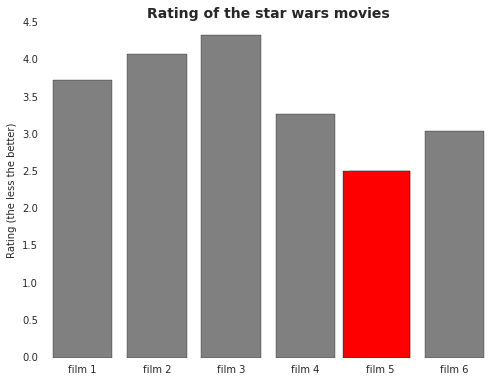

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# creating mean rating for each movie over the rank columns 
mean_rank = star_wars[star_wars.columns[9:15]].mean()
# creating bar plot for analysis
fig,ax = plt.subplots(figsize = (8,6), )
sns.set(style="white")
sns.barplot(x = mean_rank.index, y = mean_rank, color = 'grey')
plt.bar(3.5, 2.513158, width = 0.9, color = 'red')
sns.despine(bottom = True, left = True)
ax.set_xticklabels(['film {}'.format(i+1) for i in range(6)])
plt.ylabel('Rating (the less the better)', fontsize = 10)
plt.title('Rating of the star wars movies', fontsize = 14, weight = 'bold')
plt.grid(False)
plt.show()


As we can see from this barplot, based on the respondent's ranks, the 5 film has the best average rating, the runner-up - the sixth film. 
It was a predictable result. The "original" movies are rated much more highly than the newer ones. This happens all the time, as the feeling of nostalgia plays a role.

We can figure out how many people have seen each movie just by taking the sum of the `seen` column (even though they contain Boolean values).

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



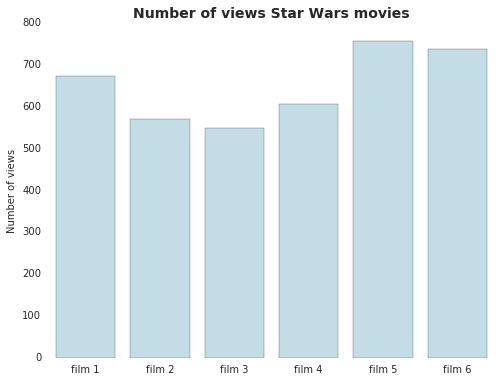

In [56]:
# extarcting information about the number of views
n_seen = star_wars[star_wars.columns[3:9]].sum()

fig,ax = plt.subplots(figsize = (8,6))
sns.set(style="white")
sns.barplot(x = n_seen.index, y = n_seen, color = 'lightblue', alpha = 0.8)
# plt.bar(3.5, 2.513158, width = 0.9, color = 'red')
sns.despine(bottom = True, left = True)
ax.set_xticklabels(['film {}'.format(i+1) for i in range(6)])
plt.ylabel('Number of views', fontsize = 10)
plt.title('Number of views Star Wars movies', fontsize = 14, weight = 'bold')
plt.show()


So, the 'original' movies have the most number of views too. Whereas the newer films are less popular. There is an obvious correlation between rating and number of views. The more people watch the movie the more rating it has. 

Below the r-value of this correlation:

In [57]:
n_seen.reset_index(drop = True).corr(mean_rank.reset_index(drop = True))

-0.8781264941384702

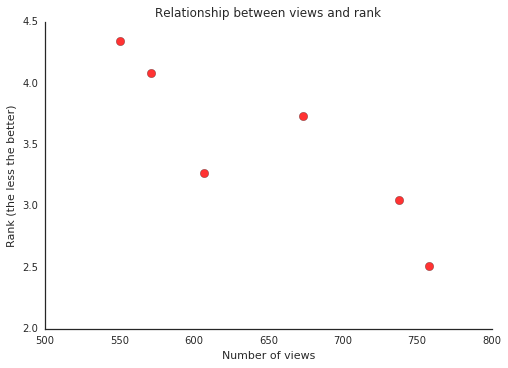

In [58]:
plt.scatter(n_seen, mean_rank, s = 70, c = 'r', alpha = 0.8)
sns.despine()
plt.xlabel('Number of views')
plt.ylabel('Rank (the less the better)')
plt.title('Relationship between views and rank')
plt.show()

At the same time, we see an explicit dividing our data into 2 clusters (one for the 'original' series and one for the newer one)

## Exploring fans and gender differences

____
Let's now include information about whether or not a respondent is a fan of the Star Wars film franchise and redo this analysis.

In [59]:
# split the dataset into two groups: for fans and not fans
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fun = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [60]:
# creating data frames with `fan` column to indicate whether or not a person is a fann
fan_views = pd.DataFrame(fan[fan.columns[3:9]].sum()) # mean rating of fans
not_fun_views = pd.DataFrame(not_fun[not_fun.columns[3:9]].sum())# mean rating of not fans
# add indicates to distinguish fans and not fans
fan_views['fan'] = 'fan'
not_fun_views['fan'] = 'not a fan'
# combine to get unite dataframe
views = pd.concat([fan_views,not_fun_views])
# change names of columns for convenience
views.columns = ['seen', 'fan']
views

,seen,fan
seen_1,500,fan
seen_2,463,fan
seen_3,450,fan
seen_4,483,fan
seen_5,538,fan
seen_6,537,fan
seen_1,173,not a fan
seen_2,108,not a fan
seen_3,100,not a fan
seen_4,124,not a fan


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



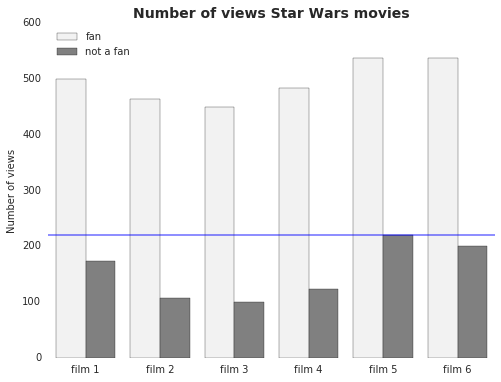

In [61]:
# plotting barplots using hue for fan column
fig,ax = plt.subplots(figsize = (8,6))
sns.set(style="white")
sns.barplot(x = views.index, y = 'seen', hue = 'fan', data = views, color = 'grey')
plt.axhline(220, alpha = 0.5)
sns.despine(bottom = True, left = True)
ax.set_xticklabels(['film {}'.format(i+1) for i in range(6)])
plt.ylabel('Number of views', fontsize = 10)
plt.title('Number of views Star Wars movies', fontsize = 14, weight = 'bold')
plt.legend(loc = 'best')
plt.show()

From this bar plot, we see pretty the same template, The most popular movies are the last two as for fan of the franchise as for not fans

In [62]:
# doing the same for rank
def do_the_df_rank(columns):
    fan_views = pd.DataFrame(fan[columns].mean()) # do func for fans
    not_fun_views = pd.DataFrame(not_fun[columns].mean())# do func for not fans
    fan_views['fan'] = 'fan'
    not_fun_views['fan'] = 'not a fan'
    views = pd.concat([fan_views,not_fun_views])
    views.columns = ['rank', 'fan']
    return views
views = do_the_df_rank(star_wars.columns[9:15])

In [63]:
views

,rank,fan
ranking_1,4.141304,fan
ranking_2,4.342391,fan
ranking_3,4.417423,fan
ranking_4,2.932971,fan
ranking_5,2.333333,fan
ranking_6,2.829710,fan
ranking_1,2.936396,not a fan
ranking_2,3.591549,not a fan
ranking_3,4.193662,not a fan
ranking_4,3.933099,not a fan


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



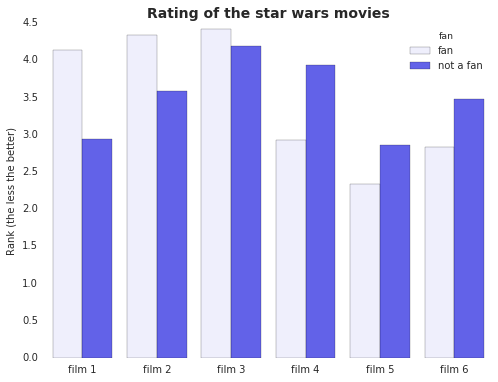

In [64]:
# plotting for rank
fig,ax = plt.subplots(figsize = (8,6))
sns.set(style="white")
sns.barplot(x = views.index, y = 'rank', hue = 'fan', data = views, color = 'blue', alpha = 0.7)
sns.despine(bottom = True, left = True)
ax.set_xticklabels(['film {}'.format(i+1) for i in range(6)])
plt.ylabel('Rank (the less the better)', fontsize = 10)
plt.title('Rating of the star wars movies', fontsize = 14, weight = 'bold')
plt.show()

There we see that people who are not fans of the franchise like the first film almost as much as the fifth film, despite the fact, that they watch that movie much less than fans do. But overall picture the same as for fans and for not fans. From newer movies, people like the first one the most, and from the 'original' the fifth one.

Now, I'd like to investigate the situation according to the 'Gender' column with the same approach.

### Gender differences

In [65]:
# split data according to gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
# axualary dunctions to get data frames, doing the same approach as before

def do_gender_df_ranc(columns):
    males_1 = pd.DataFrame(males[columns].mean()) # do func for fans
    females_2 = pd.DataFrame(females[columns].mean())# do func for not fans
    males_1['gender'] = 'Male'
    females_2['gender'] = 'Female'
    gender_ranc = pd.concat([males_1,females_2])
    gender_ranc.columns = ['rank', 'gender']
    return gender_ranc

def do_gender_df_views(columns):
    males_1 = pd.DataFrame(males[columns].sum()) # do func for fans
    females_2 = pd.DataFrame(females[columns].sum())# do func for not fans
    males_1['gender'] = 'Male'
    females_2['gender'] = 'Female'
    gender_views = pd.concat([males_1,females_2])
    gender_views.columns = ['seen', 'gender']
    return gender_views

gender_ranc = do_gender_df_ranc(star_wars.columns[9:15])
gender_views = do_gender_df_views(star_wars.columns[3:9])

In [66]:
gender_ranc

,rank,gender
ranking_1,4.037825,Male
ranking_2,4.224586,Male
ranking_3,4.274882,Male
ranking_4,2.997636,Male
ranking_5,2.458629,Male
ranking_6,3.002364,Male
ranking_1,3.429293,Female
ranking_2,3.954660,Female
ranking_3,4.418136,Female
ranking_4,3.544081,Female


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



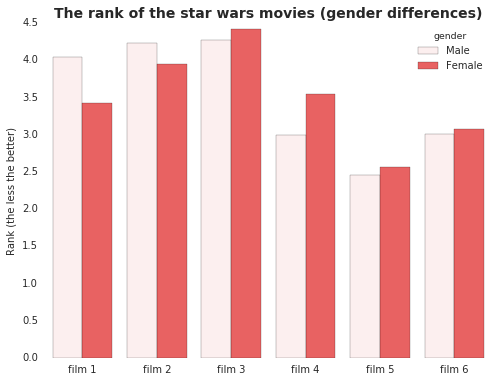

In [67]:
# plotting for rank
fig,ax = plt.subplots(figsize = (8,6))
sns.set(style="white")
sns.barplot(x = gender_ranc.index, y = 'rank', hue = 'gender', data = gender_ranc, color = 'red', alpha = 0.7)
sns.despine(bottom = True, left = True)
ax.set_xticklabels(['film {}'.format(i+1) for i in range(6)])
plt.ylabel('Rank (the less the better)', fontsize = 10)
plt.title('The rank of the star wars movies (gender differences)', fontsize = 14, weight = 'bold')
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



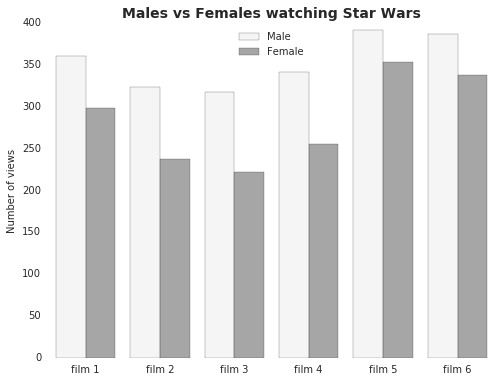

In [68]:
# plotting number of views according to the gender difference
fig,ax = plt.subplots(figsize = (8,6))
sns.set(style="white")
sns.barplot(x = gender_views.index, y = 'seen', hue = 'gender', data = gender_views, color = 'grey', alpha = 0.7)
sns.despine(bottom = True, left = True)
ax.set_xticklabels(['film {}'.format(i+1) for i in range(6)])
plt.ylabel('Number of views', fontsize = 10)
plt.title('Males vs Females watching Star Wars', fontsize = 14, weight = 'bold')
plt.legend(loc = 'best')
plt.show()

We can see an interesting conclusion according to gender differences. Males watch the first 3 films more than females but like them less than females do.

## Investigating characters 

### Preparing data for character analysis

In [69]:
# as we deleted the row after header where the description was
# I read '.scv' again and extract the subheader
star_wars_head = pd.read_csv('star_wars.csv')
star_wars_head = star_wars_head.iloc[0,15:29].values
star_wars_head

array(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'], dtype=object)

So, first of all, we should rename and clean these columns

In [70]:
characters  = star_wars.iloc[:,15:29]
characters.head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [71]:
characters.iloc[:,0].value_counts(dropna = False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

___
We have different types of answers to questions about characters.  We have pretty much `NaN` values and we can't just drop them because we may lose a lot of useful information. So, we need to explore and try to replace them. We may apply two approaches, the first one - is to treat them as 'Unfamiliar' and as 'neutral'. I guess, most of the people just skip this question as they didn't really know that character. So, we might replace NaN values and would treat them as 'Unfamiliar', but first, we should inspect the nature of the missing values

Also, we must mull over how to set categories of the characters.
I assume we should combine 'very favorably' and 'somewhat favorably', the same we will do with unfavorable columns.
Then, we will rename columns and calculate the frequency table of likes and dislikes to answer the following questions:

* Which character do respondents like the most?
* Which character do respondents dislike the most?
* Which character is the most controversial (split between likes and dislikes)?

Let's use these approaches to explore these questions
___

In [72]:
for i in range(14):
    characters.iloc[:,i] = characters.iloc[:,i].map({
        'Very favorably' : 'favorably',
        'Somewhat favorably' : 'favorably',
        'Very unfavorably' : 'unfavorably',
        'Somewhat unfavorably' : 'unfavorably',
        'Neither favorably nor unfavorably (neutral)' : 'neutral',
        'Unfamiliar (N/A)' : 'Unfamiliar'
    })

In [73]:
characters.iloc[:,0].value_counts(dropna = False)

favorably      761
NaN            357
neutral         44
Unfamiliar      15
unfavorably      9
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [74]:
characters.iloc[:,6].value_counts(dropna = False)

favorably      481
NaN            360
unfavorably    251
neutral         84
Unfamiliar      10
Name: Unnamed: 21, dtype: int64

___
Let's find the nature of the null values. If we look `.value_counts()` for all of the columns, the number of the NaN values will be different. We should find out whether the NaN values located in the same rows over all columns or not. 

We will use heatmaps for that reason.

In [75]:
# plotting useful tool for investigating patterns of null values 
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.show()

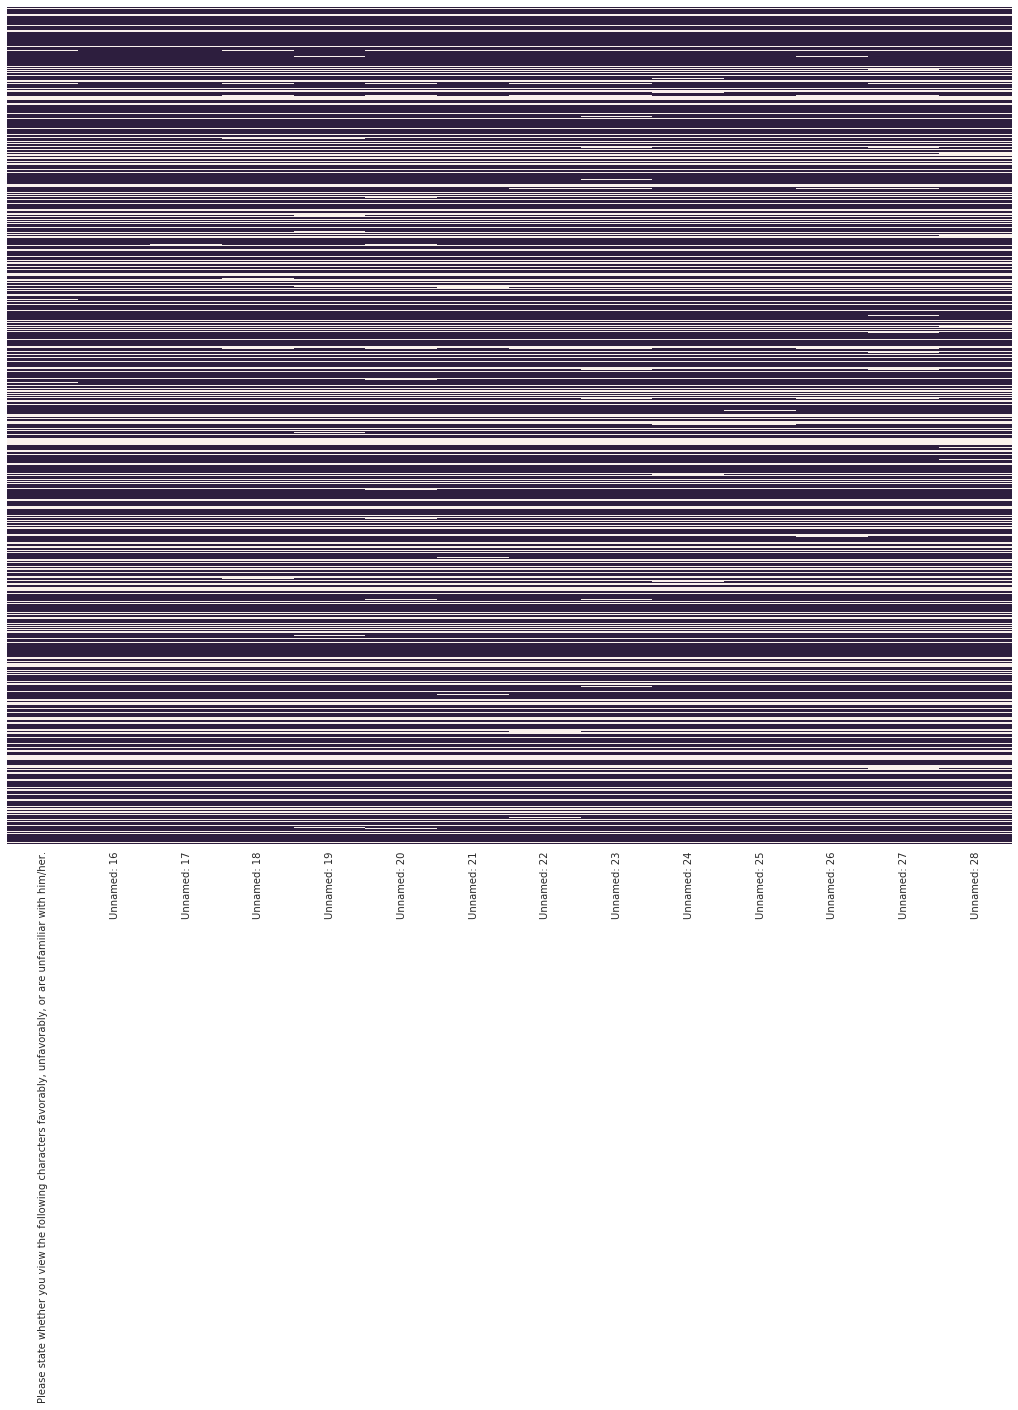

In [76]:
plot_null_matrix(characters)

___
Now we see, that some rows have missing values are over all columns. I suggest dropping these rows as they don't mean anything for analysis and we can't substitute them with reasonable values. The rest of the missing values we will keep and treat them as 'Unfamiliar'.
___

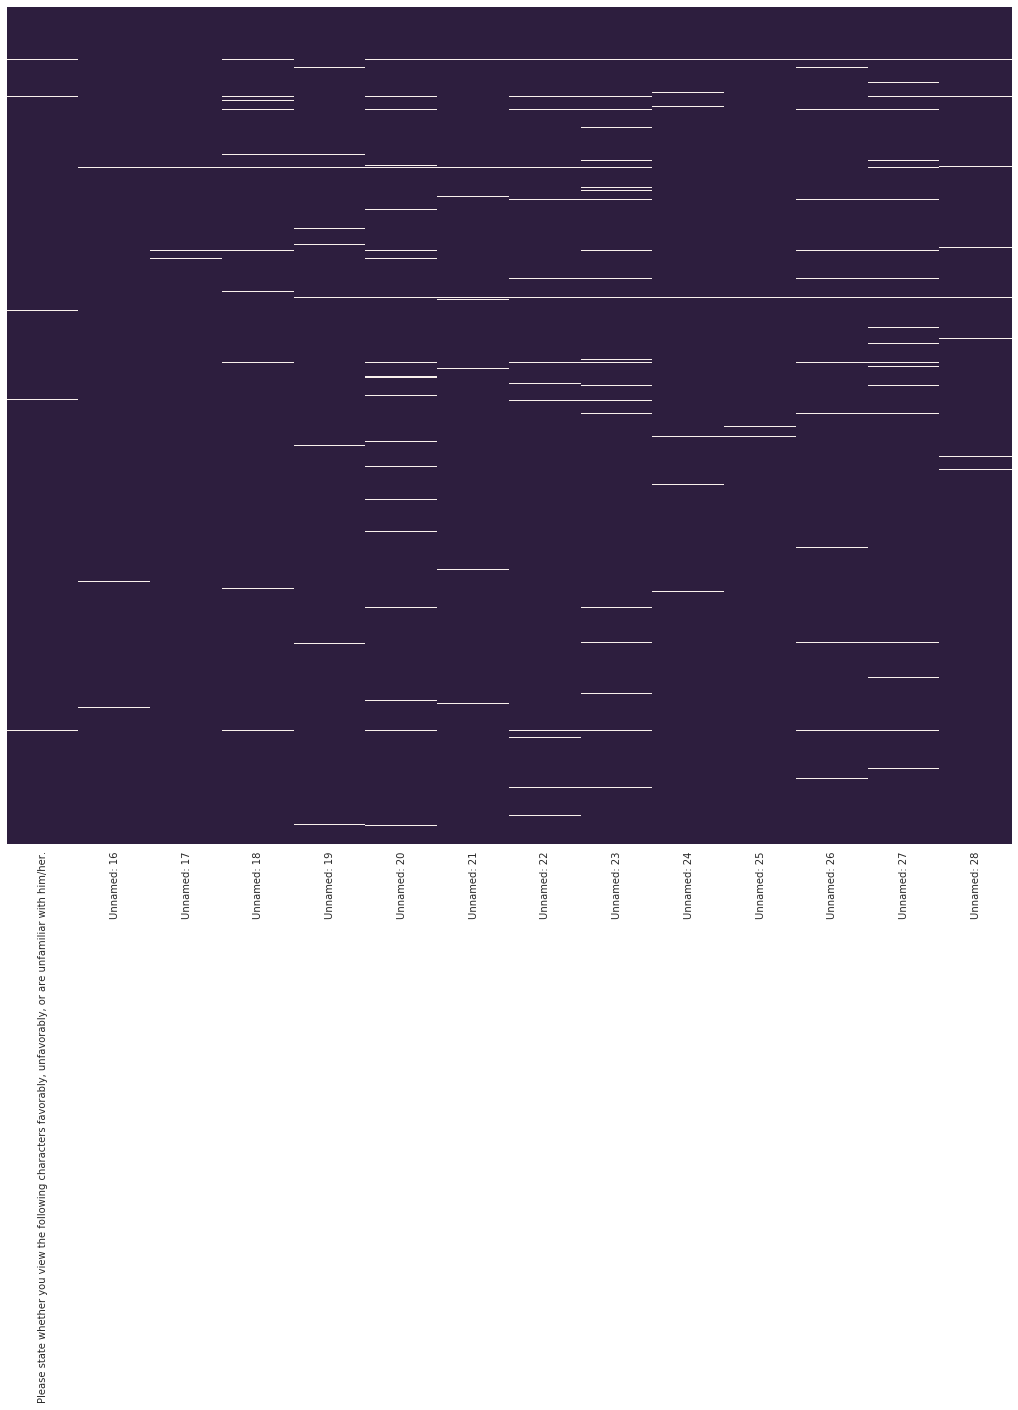

In [77]:
characters = characters[characters.isnull().sum(axis = 1) != 14]
plot_null_matrix(characters)

In [78]:
characters[characters.isnull().sum(axis = 1) < 10].sample(5)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
572,favorably,favorably,favorably,Unfamiliar,favorably,Unfamiliar,unfavorably,Unfamiliar,favorably,favorably,NaN,Unfamiliar,Unfamiliar,favorably
792,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably
520,favorably,favorably,favorably,favorably,favorably,unfavorably,favorably,favorably,neutral,favorably,favorably,unfavorably,favorably,favorably
1182,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably
63,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,favorably,neutral,neutral,favorably


I think to replace missing values with 'Unfamiliar' a good approach, as we see that

In [79]:
characters = characters.fillna('Unfamiliar')

Next, let's rename column names according to subheader that we assign before to variable named `star_wars_head`:

In [80]:
characters.columns = star_wars_head

In [81]:
characters.isnull().sum()

Han Solo                0
Luke Skywalker          0
Princess Leia Organa    0
Anakin Skywalker        0
Obi Wan Kenobi          0
Emperor Palpatine       0
Darth Vader             0
Lando Calrissian        0
Boba Fett               0
C-3P0                   0
R2 D2                   0
Jar Jar Binks           0
Padme Amidala           0
Yoda                    0
dtype: int64

Next, creating a frequancy table:

In [82]:
freq_table_chars = characters.apply(pd.value_counts)

In [83]:
freq_table_chars

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Unfamiliar,20,9,11,63,26,176,18,162,154,22,14,122,184,18
favorably,761,771,757,514,750,253,481,365,291,703,747,242,351,749
neutral,44,38,48,135,43,213,84,236,248,79,57,164,207,51
unfavorably,9,16,18,122,15,192,251,71,141,30,16,306,92,16


### Who we like and dislike most?

___
Let's now create plots to look insight into the data and answer questions set above. 

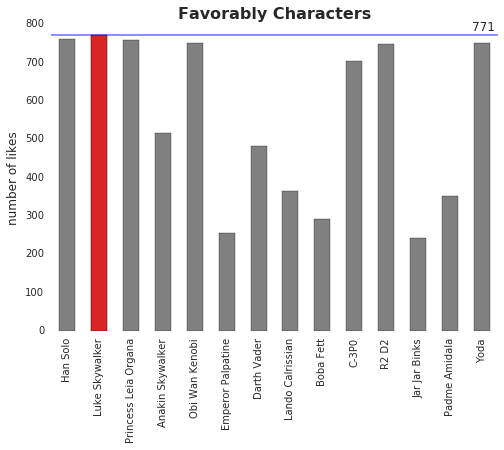

In [84]:
# creating and adjusting plot of favorably characters

freq_table_chars.loc['favorably'].plot.bar(color = 'grey')
plt.bar(0.75 ,771, width = 0.5 ,color = 'red', alpha = 0.7)
plt.text(12.7 ,781, '771')
plt.axhline(771, alpha = 0.5)
plt.box(False)
plt.ylabel('number of likes', fontsize = 12)
plt.title('Favorably Characters', fontsize = 16, weight = 'bold')
plt.show()

It's unsurprisingly for me, that people like characters of the resistance most. The first three adorable characters are Han Solo, Luke Skywalker and Princess Leia. 

Let's find out about the most unfavorable character:

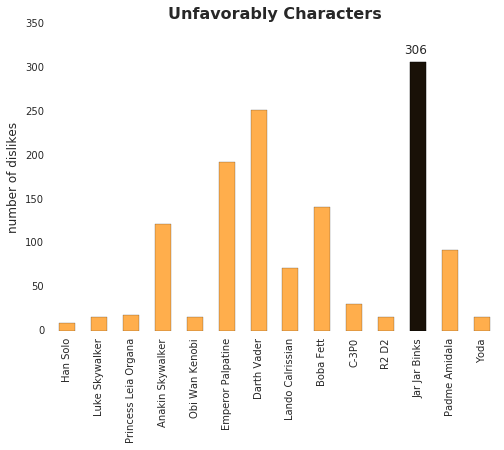

In [85]:
# creating and adjusting plot of unfavorably characters

freq_table_chars.loc['unfavorably'].plot.bar(color = 'darkorange', alpha = 0.7)
plt.bar(10.75 ,306, width = 0.5 ,color = 'black', alpha = 0.9)
plt.text(10.55 ,316, '306')
plt.box(False)
plt.ylabel('number of dislikes', fontsize = 12)
plt.title('Unfavorably Characters', fontsize = 16, weight = 'bold')
plt.show()

The absolute leader in that category is Jar Jar Binks followed by Darth Vader. 

Now, what's interesting to know is who the most controversial character and split between likes and dislikes. To answer that question we will build two bar plots "face to face".

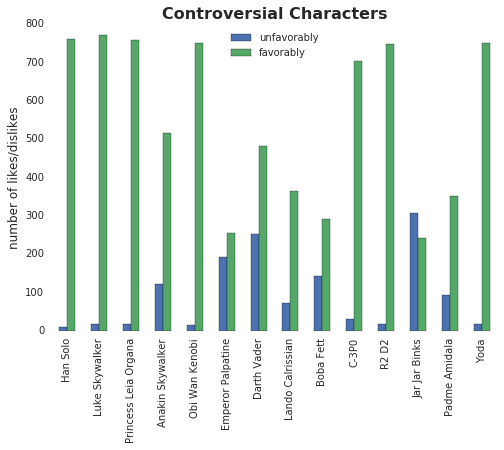

In [86]:
# finding controversial characters

freq_table_chars.loc[['unfavorably', 'favorably']].T.plot.bar()
plt.ylabel('number of likes/dislikes', fontsize = 12)
plt.title('Controversial Characters', fontsize = 16, weight = 'bold')
plt.box(False)
plt.show()

As we see from these bar plots, Jar Jar Binks and Emperor Palpatine are the most controversial characters. People dislike them from one hand and like from another.

# Conclusion 

In that project we managed to clean and prepared survey data for analysis, we explored and changed the structure of the columns to work with them, found some patterns analyzing missing values, considered how to treat them better. We found out some interesting questions such as finding the highest-ranked movie, explored how this tendency changes according to whether this person fan or not a fan of the franchise and their gender, also explored issues about characters of the saga. All of this we achieved using great tools of pandas vectorization and applying the visualization.